In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'car-plate-detection:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F686454%2F1203932%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240621%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240621T160124Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D787d0159c500ad55cac18f7be544d6b894973325f074bfd7ca7d2447278461f9154e7815d5a7ca53369fd67d5f807a706a71bc61f64d617ee200af0329474ed1279e718bc4ebe070cf9ac18d45ec6c13a0f17a39b7d2bbb791a319f5aef1cba317962d60b016af0604226816ec50f9638b2a6f39e0fdd36eba7f3c09c64bfb63c5b4c3afe36f343743dd5923d2901d830febd114137450769721fc67817f05959ba9dc30e440867f99386db8724f86d7589548a05708df0143bb239b22ca0a6902429c5bf1c12604eb6ced544e8aac2697b4920c851dfffdcb32fd02f5118a055d3de85e6e50f8e2b34f6e02c60a478ef9ce6b761190e9645d03a6a44990955a,alpr-character-train:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1025532%2F1728200%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240621%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240621T160125Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8f22aa1ce4bce7771139e3e130485442edc0bfe2edfc574992ba655daa0e41c63ae5b56e381fb9442c68f2c1814300608afbddb6848bbfb232b84d003bae9230f6ff742202eee1ecc8bbb8a1b919779f9e22b16ece370e80d5928aa645a6f06af45d9f52c0dbdca05062d92a0cb6a7b76a70ecf06fb2389e7b8f900a1237c06a31cee373f6e2225bc64ad279d46f065fddc74aaa17936bd72e18980938f464b0309f68dab8ba0126658c7bfbb276b1067de915ed756a4e13ee91ae00b1165325af54e2d8ae405a27c3015b1607d20c66f4025adde0b29a5174ccffbd14fef68a2c617be95eec03a2aacc97822f708861c7b645e79188b635999308c527b89606'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 212910636 bytes downloaded
Downloaded and uncompressed: car-plate-detection
[==================================================] 1479084 bytes downloaded
Downloaded and uncompressed: alpr-character-train
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-plate-detection/annotations/Cars411.xml
/kaggle/input/car-plate-detection/annotations/Cars100.xml
/kaggle/input/car-plate-detection/annotations/Cars296.xml
/kaggle/input/car-plate-detection/annotations/Cars106.xml
/kaggle/input/car-plate-detection/annotations/Cars274.xml
/kaggle/input/car-plate-detection/annotations/Cars427.xml
/kaggle/input/car-plate-detection/annotations/Cars316.xml
/kaggle/input/car-plate-detection/annotations/Cars298.xml
/kaggle/input/car-plate-detection/annotations/Cars358.xml
/kaggle/input/car-plate-detection/annotations/Cars1.xml
/kaggle/input/car-plate-detection/annotations/Cars227.xml
/kaggle/input/car-plate-detection/annotations/Cars214.xml
/kaggle/input/car-plate-detection/annotations/Cars275.xml
/kaggle/input/car-plate-detection/annotations/Cars414.xml
/kaggle/input/car-plate-detection/annotations/Cars154.xml
/kaggle/input/car-plate-detection/annotations/Cars230.xml
/kaggle/input/car-plate-detection/annotations/Cars136.xml
/kaggle/input/ca

In [3]:
pip install pytesseract

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
from PIL import Image
plt.style.use('dark_background')

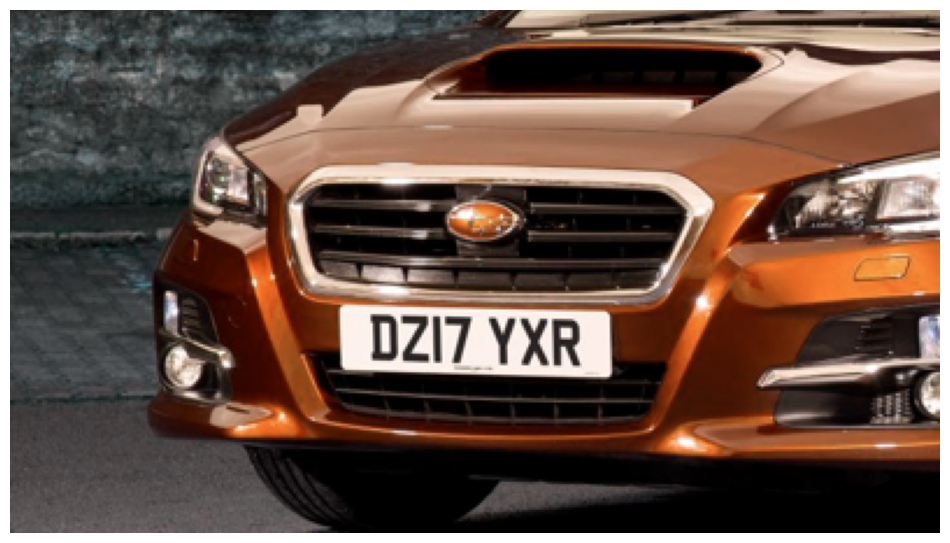

In [126]:
img_ori = cv2.imread('/kaggle/input/car-plate-detection/images/Cars3.png')

height, width, channel = img_ori.shape

plt.figure(figsize=(12, 10))
plt.imshow(img_ori, cmap='gray')
plt.axis('off')
plt.savefig('Car.png',bbox_inches = 'tight')
plt.show()

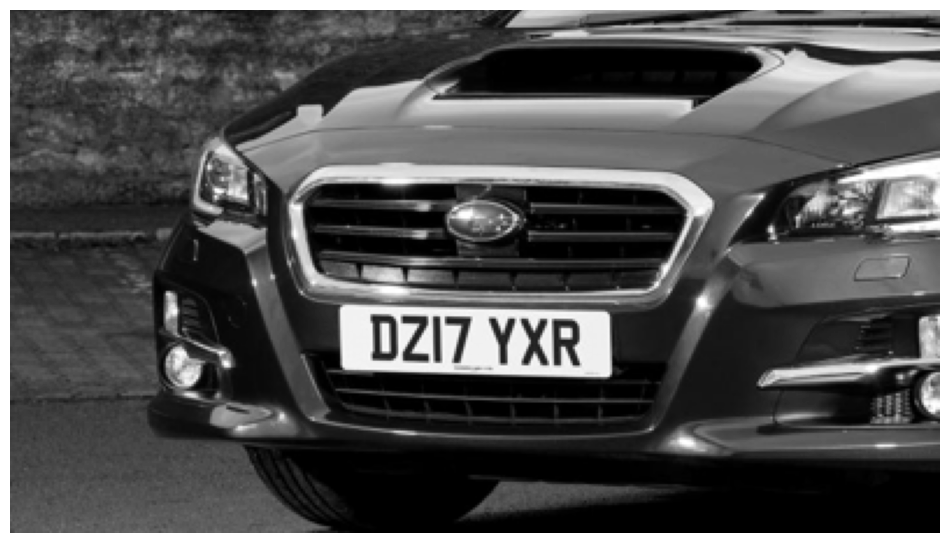

In [127]:
gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 10))
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.savefig('Car-GrayScale.png',bbox_inches = 'tight')
plt.show()

In [128]:
!pip install pytesseract
!apt-get install tesseract-ocr
!pip install easyocr
!pip install torch torchvision torchaudio
!pip install matplotlib opencv-python-headless

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


## Pyramid Implementation

In [140]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr
import os

In [141]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

# Load the image
image_path = '/kaggle/input/car-plate-detection/images/Cars3.png'  # Replace with your image path
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use edge detection to find the number plate
edges = cv2.Canny(gray, 100, 200)

# Find contours in the edged image
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

# Loop over contours to find the best approximated rectangle
number_plate_contour = None
for contour in contours:
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    if len(approx) == 4:  # Check for a rectangle
        number_plate_contour = approx
        break

# Create a mask to extract the number plate area
mask = np.zeros(gray.shape, dtype=np.uint8)
if number_plate_contour is not None:
    cv2.drawContours(mask, [number_plate_contour], -1, 255, -1)

# Bitwise-and to extract the number plate
number_plate_area = cv2.bitwise_and(gray, gray, mask=mask)

In [142]:

# Gaussian Pyramid
gp = [number_plate_area]
for i in range(6):
    gray = cv2.pyrDown(gp[-1])
    gp.append(gray)

# Laplacian Pyramid
lp = [gp[-1]]  # Start with the smallest level
for i in range(5, 0, -1):
    GE = cv2.pyrUp(gp[i])
    # Ensure the expanded image matches the size of the previous level
    if GE.shape != gp[i-1].shape:
        GE = cv2.resize(GE, (gp[i-1].shape[1], gp[i-1].shape[0]))
    L = cv2.subtract(gp[i-1], GE)
    lp.append(L)



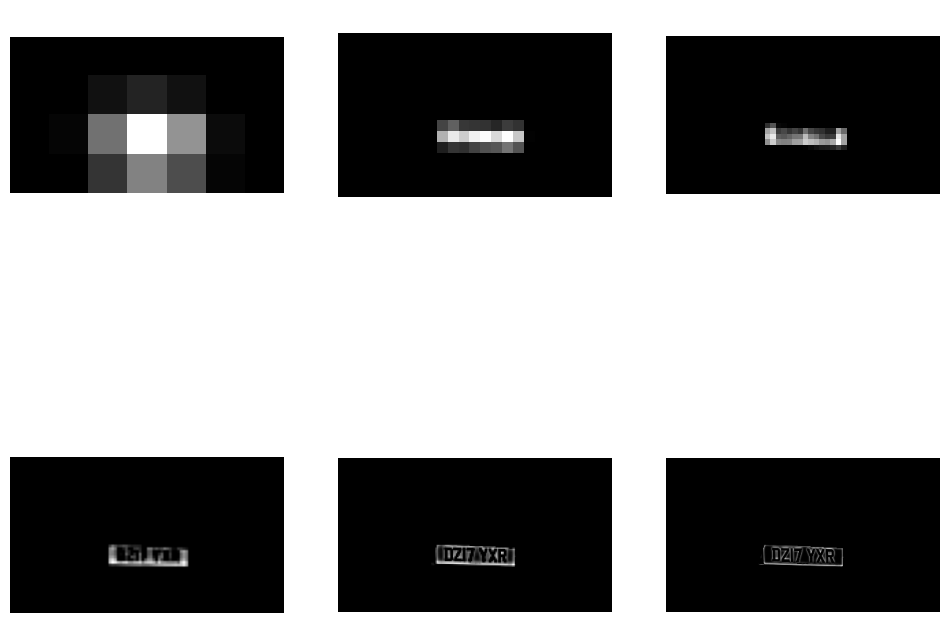

In [143]:
# Display results of the Laplacian Pyramid
plt.figure(figsize=(12, 10))
for i in range(len(lp)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(lp[i], cmap='gray')
    plt.title(f'Laplacian level {i}')
    plt.axis('off')
plt.show()

In [144]:
 # Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])

In [145]:
result = reader.readtext(number_plate_area)
recognized_text = ' '.join([res[1] for res in result])#Extra
print("Recognized text:", recognized_text)
print(result)

Recognized text: DZI7 YXR
[([[150, 128], [252, 128], [252, 158], [150, 158]], 'DZI7 YXR', 0.7164356650074859)]


In [135]:
        # Post-processing to correct common OCR errors
replacements = {
    'O': '0',  # Common misrecognition of 'O' as '0'
    'I': '1',  # Common misrecognition of 'I' as '1'
    'Z': '2',  # Common misrecognition of 'Z' as '2'
    'S': '5',  # Common misrecognition of 'S' as '5'
    'B': '8',  # Common misrecognition of 'B' as '8'
    'G': '6'   # Common misrecognition of 'G' as '6'
}
corrected_text = ''.join([replacements.get(c, c) for c in recognized_text])
print("Corrected text:", corrected_text)

Corrected text: D217 YXR


In [147]:
        # Calculate accuracy
        ground_truth_text = "D217 YXR"
        def calculate_accuracy(predicted, actual):
            predicted = predicted.strip().replace(" ", "")
            actual = actual.strip().replace(" ", "")
            total_chars = len(actual)
            correct_chars = sum(1 for p, a in zip(predicted, actual) if p == a)
            return correct_chars / total_chars

        accuracy = calculate_accuracy(corrected_text, ground_truth_text)
        print(f"OCR Accuracy: {accuracy * 100:.2f}%")


OCR Accuracy: 100.00%


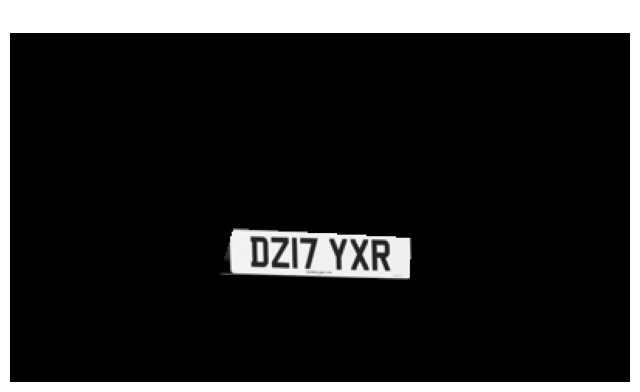

In [148]:
# Display the number plate area
plt.figure(figsize=(8, 6))
plt.imshow(number_plate_area, cmap='gray')
plt.title('Number Plate Area')
plt.axis('off')
plt.show()

Ensemble Learning Model

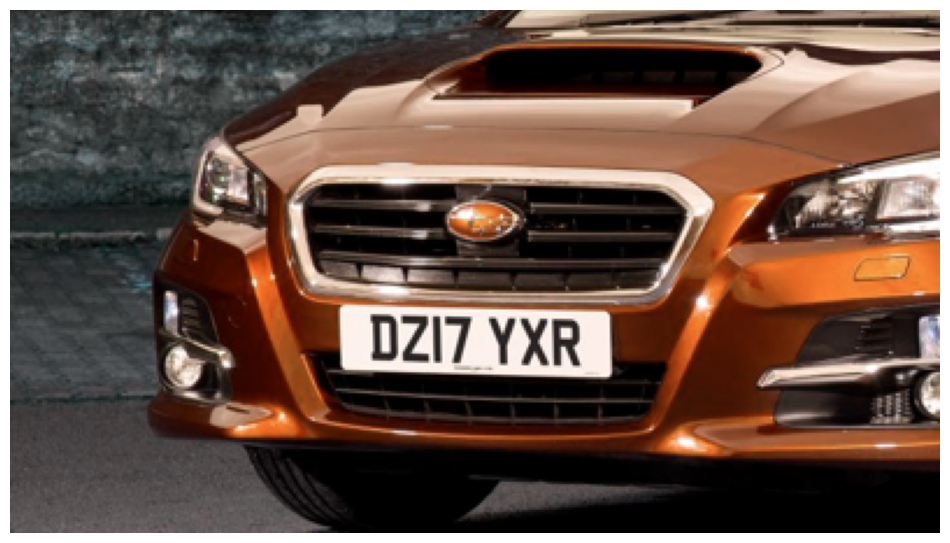

In [149]:
img_ori = cv2.imread('/kaggle/input/car-plate-detection/images/Cars3.png')

height, width, channel = img_ori.shape

plt.figure(figsize=(12, 10))
plt.imshow(img_ori, cmap='gray')
plt.axis('off')
plt.savefig('Car.png',bbox_inches = 'tight')
plt.show()

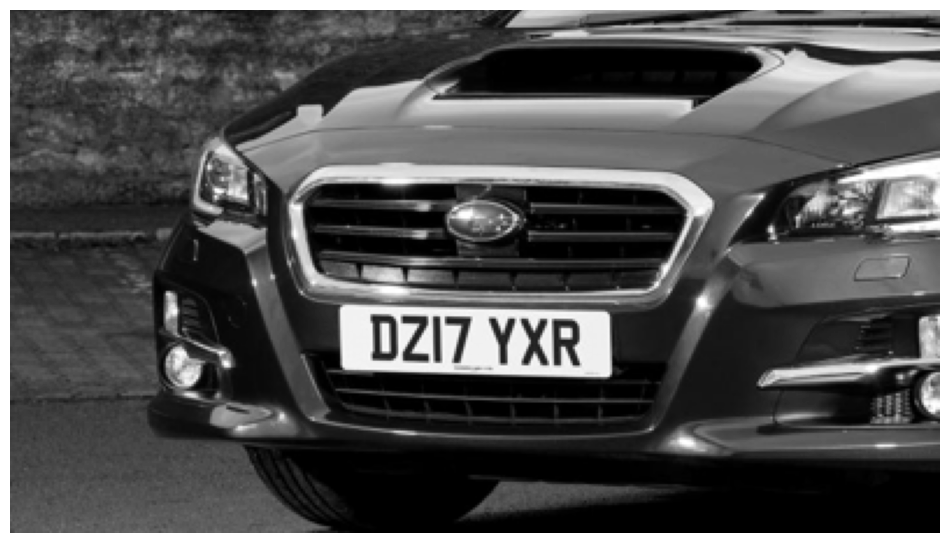

In [150]:
gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 10))
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.savefig('Car-GrayScale.png',bbox_inches = 'tight')
plt.show()

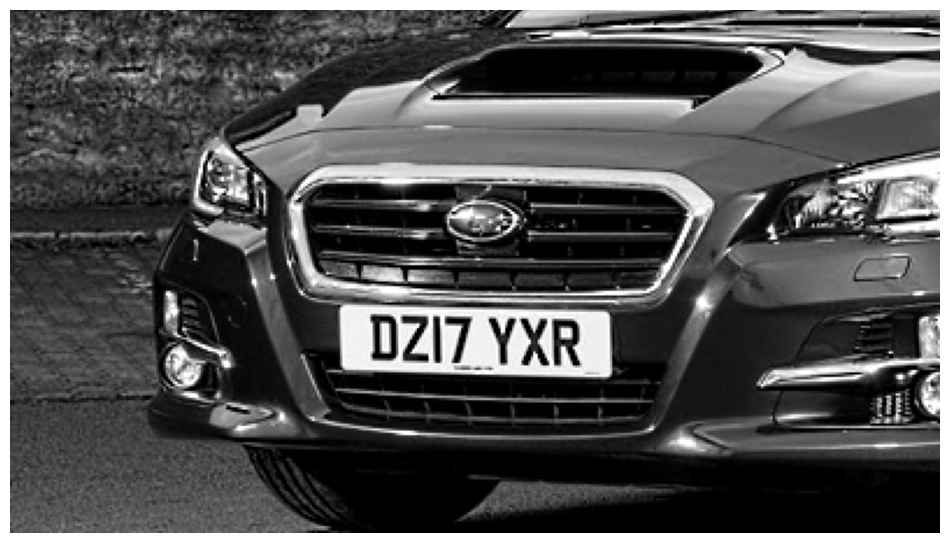

In [151]:
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

imgTopHat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, structuringElement)
imgBlackHat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, structuringElement)

imgGrayscalePlusTopHat = cv2.add(gray, imgTopHat)
gray = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

plt.figure(figsize=(12, 10))
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.savefig('Car-Contrast.png',bbox_inches = 'tight')
plt.show()

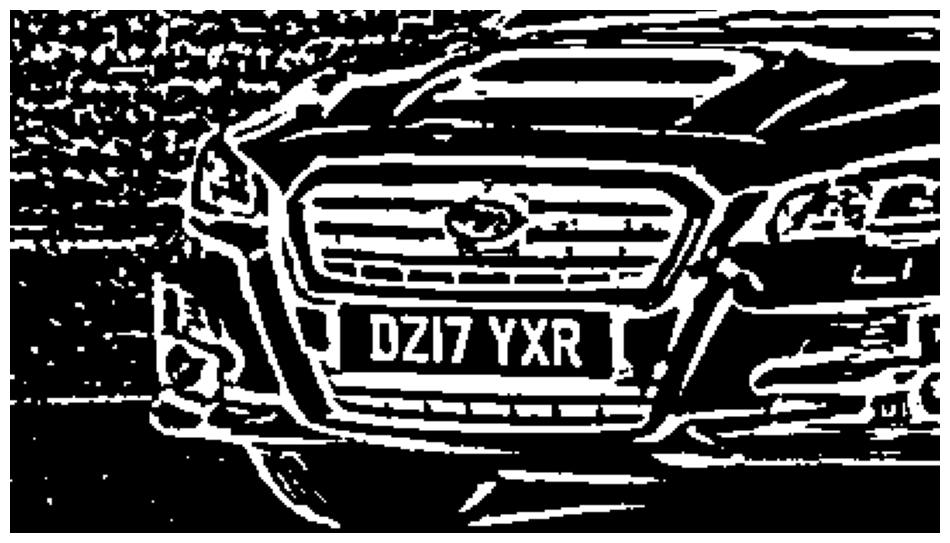

In [152]:
img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)

img_thresh = cv2.adaptiveThreshold(
    img_blurred,
    maxValue=255.0,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=19,
    C=9
)

plt.figure(figsize=(12, 10))
plt.imshow(img_thresh, cmap='gray')
plt.axis('off')
plt.savefig('Car-Adaptive-Thresholding.png',bbox_inches = 'tight')
plt.show()

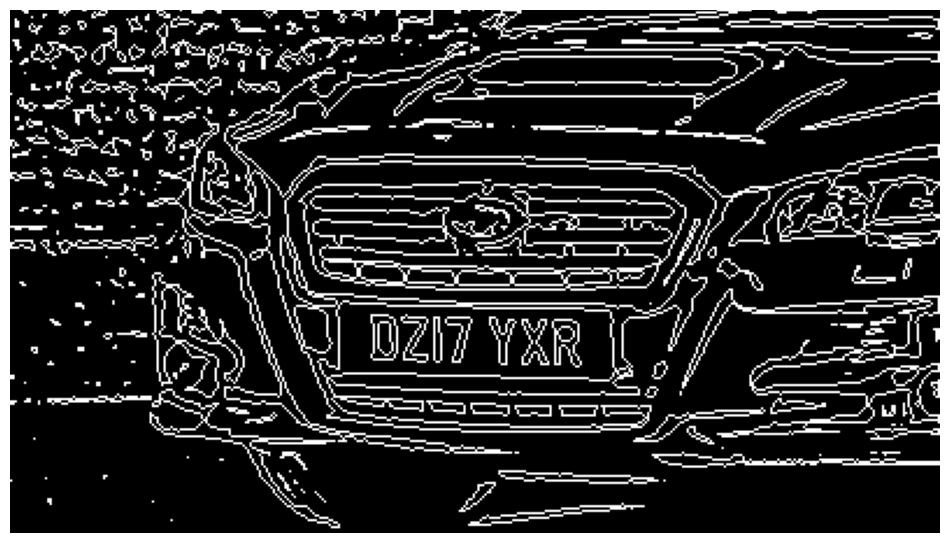

In [153]:
    contours, _= cv2.findContours(
        img_thresh,
        mode=cv2.RETR_LIST,
        method=cv2.CHAIN_APPROX_SIMPLE
    )

temp_result = np.zeros((height, width, channel), dtype=np.uint8)

cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=(255, 255, 255))

plt.figure(figsize=(12, 10))
plt.imshow(temp_result)
plt.axis('off')
plt.savefig('Car-Contours.png',bbox_inches = 'tight')
plt.show()

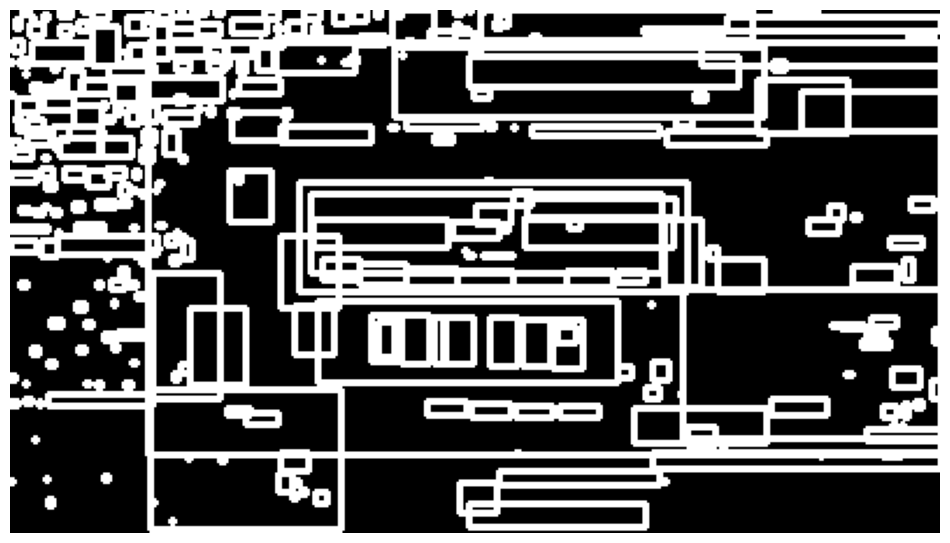

In [154]:
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

contours_dict = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(temp_result, pt1=(x, y), pt2=(x+w, y+h), color=(255, 255, 255), thickness=2)

    # insert to dict
    contours_dict.append({
        'contour': contour,
        'x': x,
        'y': y,
        'w': w,
        'h': h,
        'cx': x + (w / 2),
        'cy': y + (h / 2)
    })

plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')
plt.axis('off')
plt.savefig('Car-Boxes.png',bbox_inches = 'tight')
plt.show()


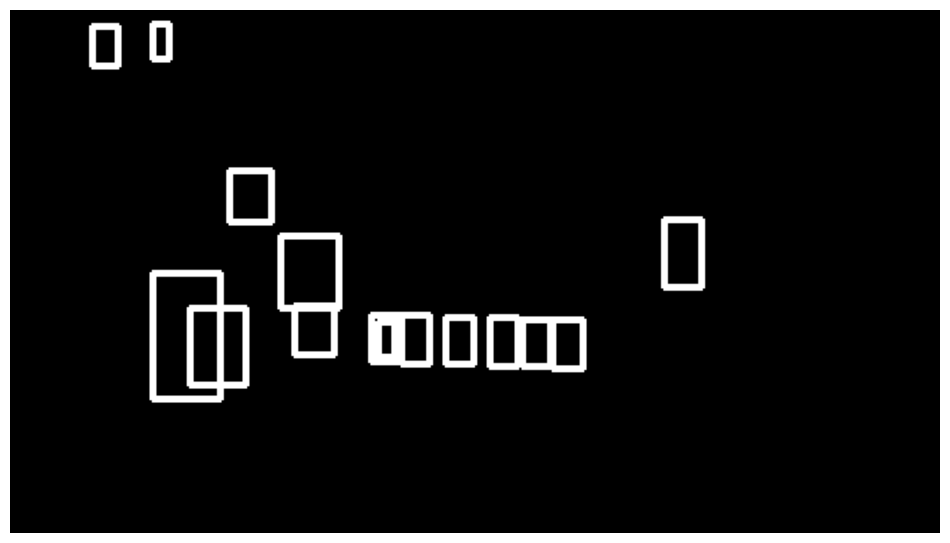

In [155]:
MIN_AREA = 80
MIN_WIDTH, MIN_HEIGHT = 2, 8
MIN_RATIO, MAX_RATIO = 0.25, 1.0

possible_contours = []

cnt = 0
for d in contours_dict:
    area = d['w'] * d['h']
    ratio = d['w'] / d['h']

    if area > MIN_AREA \
    and d['w'] > MIN_WIDTH and d['h'] > MIN_HEIGHT \
    and MIN_RATIO < ratio < MAX_RATIO:
        d['idx'] = cnt
        cnt += 1
        possible_contours.append(d)

# visualize possible contours
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for d in possible_contours:
#     cv2.drawContours(temp_result, d['contour'], -1, (255, 255, 255))
    cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)

plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')
plt.axis('off')
plt.savefig('Car-Boxes-byCharSize.png',bbox_inches = 'tight')
plt.show()

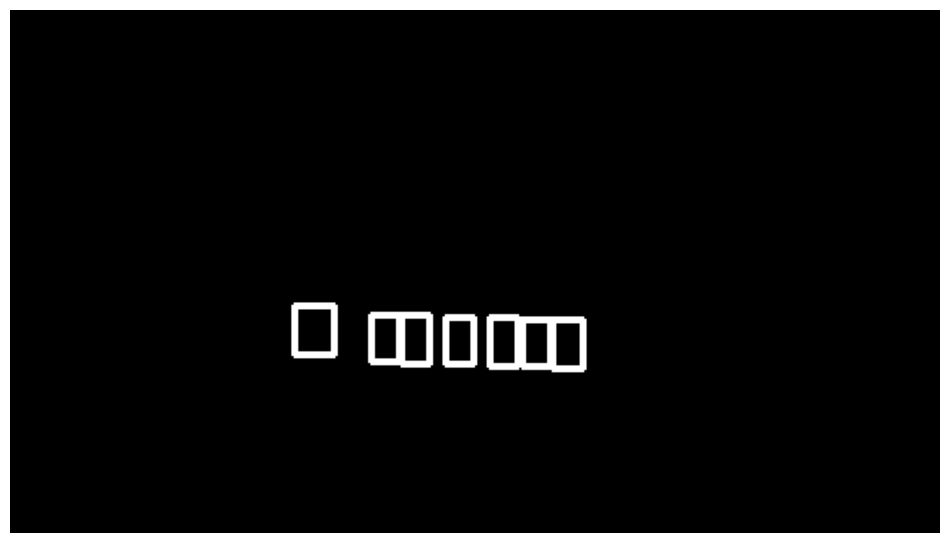

In [156]:
MAX_DIAG_MULTIPLYER = 5 # 5
MAX_ANGLE_DIFF = 12.0 # 12.0
MAX_AREA_DIFF = 0.5 # 0.5
MAX_WIDTH_DIFF = 0.8
MAX_HEIGHT_DIFF = 0.2
MIN_N_MATCHED = 3 # 3

def find_chars(contour_list):
    matched_result_idx = []

    for d1 in contour_list:
        matched_contours_idx = []
        for d2 in contour_list:
            if d1['idx'] == d2['idx']:
                continue

            dx = abs(d1['cx'] - d2['cx'])
            dy = abs(d1['cy'] - d2['cy'])

            diagonal_length1 = np.sqrt(d1['w'] ** 2 + d1['h'] ** 2)

            distance = np.linalg.norm(np.array([d1['cx'], d1['cy']]) - np.array([d2['cx'], d2['cy']]))
            if dx == 0:
                angle_diff = 90
            else:
                angle_diff = np.degrees(np.arctan(dy / dx))
            area_diff = abs(d1['w'] * d1['h'] - d2['w'] * d2['h']) / (d1['w'] * d1['h'])
            width_diff = abs(d1['w'] - d2['w']) / d1['w']
            height_diff = abs(d1['h'] - d2['h']) / d1['h']

            if distance < diagonal_length1 * MAX_DIAG_MULTIPLYER \
            and angle_diff < MAX_ANGLE_DIFF and area_diff < MAX_AREA_DIFF \
            and width_diff < MAX_WIDTH_DIFF and height_diff < MAX_HEIGHT_DIFF:
                matched_contours_idx.append(d2['idx'])

        # append this contour
        matched_contours_idx.append(d1['idx'])

        if len(matched_contours_idx) < MIN_N_MATCHED:
            continue

        matched_result_idx.append(matched_contours_idx)

        unmatched_contour_idx = []
        for d4 in contour_list:
            if d4['idx'] not in matched_contours_idx:
                unmatched_contour_idx.append(d4['idx'])

        unmatched_contour = np.take(possible_contours, unmatched_contour_idx)

        # recursive
        recursive_contour_list = find_chars(unmatched_contour)

        for idx in recursive_contour_list:
            matched_result_idx.append(idx)

        break

    return matched_result_idx

result_idx = find_chars(possible_contours)

matched_result = []
for idx_list in result_idx:
    matched_result.append(np.take(possible_contours, idx_list))

# visualize possible contours
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for r in matched_result:
    for d in r:
        #cv2.drawContours(temp_result, d['contour'], -1, (255, 255, 255))
        cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)

plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')
plt.axis('off')
plt.savefig('Car-Boxes-byContourArrangement.png',bbox_inches = 'tight')
plt.show()

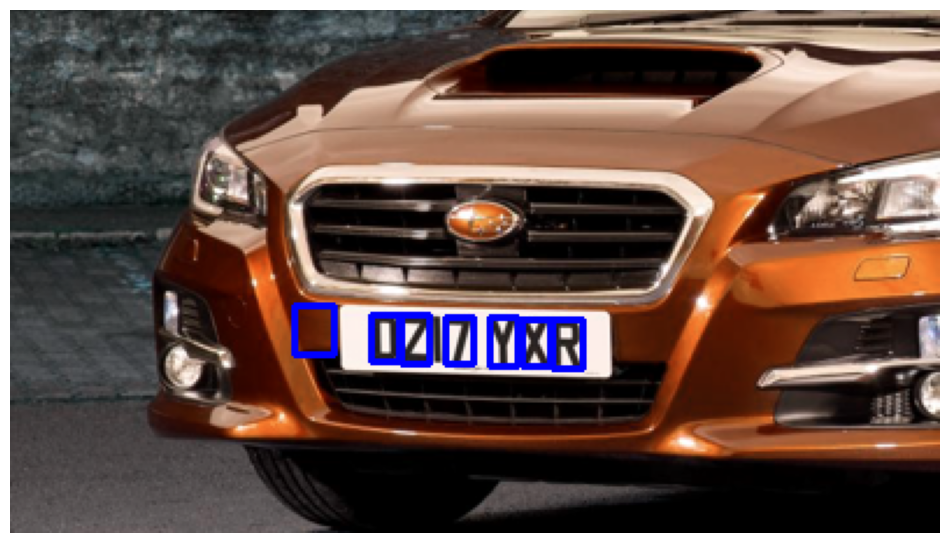

In [157]:
result_idx = find_chars(possible_contours)

matched_result = []
for idx_list in result_idx:
    matched_result.append(np.take(possible_contours, idx_list))
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for r in matched_result:
    for d in r:
        #cv2.drawContours(temp_result, d['contour'], -1, (255, 255, 255))
        cv2.rectangle(img_ori, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(0, 0, 255), thickness=2)

plt.figure(figsize=(12, 10))
plt.imshow(img_ori, cmap='gray')
plt.axis('off')
plt.savefig('Car-OverlappingBoxes.png',bbox_inches = 'tight')
plt.show()

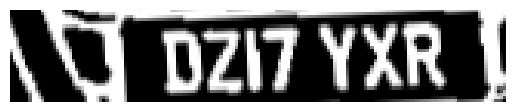

In [158]:
PLATE_WIDTH_PADDING = 1.3 # 1.3
PLATE_HEIGHT_PADDING = 1.5 # 1.5
MIN_PLATE_RATIO = 3
MAX_PLATE_RATIO = 10

plate_imgs = []
plate_infos = []

for i, matched_chars in enumerate(matched_result):
    sorted_chars = sorted(matched_chars, key=lambda x: x['cx'])

    plate_cx = (sorted_chars[0]['cx'] + sorted_chars[-1]['cx']) / 2
    plate_cy = (sorted_chars[0]['cy'] + sorted_chars[-1]['cy']) / 2

    plate_width = (sorted_chars[-1]['x'] + sorted_chars[-1]['w'] - sorted_chars[0]['x']) * PLATE_WIDTH_PADDING

    sum_height = 0
    for d in sorted_chars:
        sum_height += d['h']

    plate_height = int(sum_height / len(sorted_chars) * PLATE_HEIGHT_PADDING)

    triangle_height = sorted_chars[-1]['cy'] - sorted_chars[0]['cy']
    triangle_hypotenus = np.linalg.norm(
        np.array([sorted_chars[0]['cx'], sorted_chars[0]['cy']]) -
        np.array([sorted_chars[-1]['cx'], sorted_chars[-1]['cy']])
    )

    angle = np.degrees(np.arcsin(triangle_height / triangle_hypotenus))

    rotation_matrix = cv2.getRotationMatrix2D(center=(plate_cx, plate_cy), angle=angle, scale=1.0)

    img_rotated = cv2.warpAffine(img_thresh, M=rotation_matrix, dsize=(width, height))

    img_cropped = cv2.getRectSubPix(
        img_rotated,
        patchSize=(int(plate_width), int(plate_height)),
        center=(int(plate_cx), int(plate_cy))
    )

    if img_cropped.shape[1] / img_cropped.shape[0] < MIN_PLATE_RATIO or img_cropped.shape[1] / img_cropped.shape[0] < MIN_PLATE_RATIO > MAX_PLATE_RATIO:
        continue

    plate_imgs.append(img_cropped)
    plate_infos.append({
        'x': int(plate_cx - plate_width / 2),
        'y': int(plate_cy - plate_height / 2),
        'w': int(plate_width),
        'h': int(plate_height)
    })

    plt.subplot(len(matched_result), 1, i+1)
    plt.imshow(img_cropped, cmap='gray')
    plt.axis('off')
    plt.savefig('Car-Plates(Rotated).png',bbox_inches = 'tight')
    plt.show()

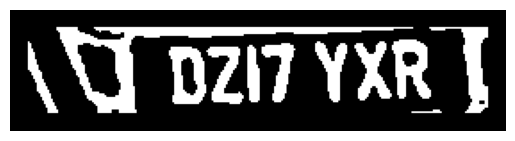

In [159]:
longest_idx, longest_text = -1, 0
plate_chars = []

for i, plate_img in enumerate(plate_imgs):
    plate_img = cv2.resize(plate_img, dsize=(0, 0), fx=1.6, fy=1.6)
    _, plate_img = cv2.threshold(plate_img, thresh=0.0, maxval=255.0, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # find contours again (same as above)
    contours, _ = cv2.findContours(plate_img, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)

    plate_min_x, plate_min_y = plate_img.shape[1], plate_img.shape[0]
    plate_max_x, plate_max_y = 0, 0

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)

        area = w * h
        ratio = w / h

        if area > MIN_AREA \
        and w > MIN_WIDTH and h > MIN_HEIGHT \
        and MIN_RATIO < ratio < MAX_RATIO:
            if x < plate_min_x:
                plate_min_x = x
            if y < plate_min_y:
                plate_min_y = y
            if x + w > plate_max_x:
                plate_max_x = x + w
            if y + h > plate_max_y:
                plate_max_y = y + h

    img_result = plate_img[plate_min_y:plate_max_y, plate_min_x:plate_max_x]

    img_result = cv2.GaussianBlur(img_result, ksize=(3, 3), sigmaX=0)
    _, img_result = cv2.threshold(img_result, thresh=0.0, maxval=255.0, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    img_result = cv2.copyMakeBorder(img_result, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
    plt.subplot(len(plate_imgs), 1, i+1)
    plt.imshow(img_result, cmap='gray')
    plt.axis('off')
    plt.savefig('Car-Plates(Thresholding).png',bbox_inches = 'tight')
    plt.show()
    break

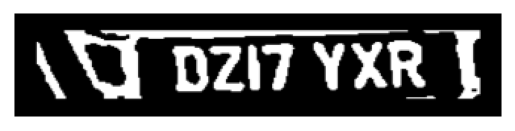

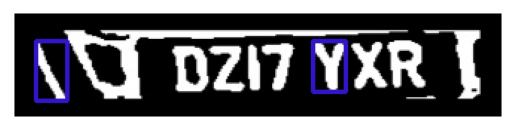

Character segmentation completed.


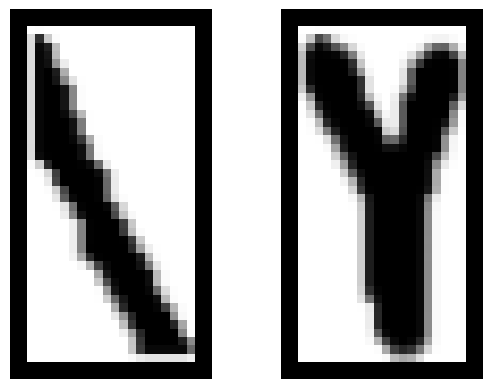

In [160]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_contours(dimensions, img):
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]

    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]

    ii = cv2.imread('contour.jpg')

    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs:
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)

        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height:
            x_cntr_list.append(intX)

            char_copy = np.zeros((44, 24))
            char = img[intY:intY + intHeight, intX:intX + intWidth]
            char = cv2.resize(char, (20, 40))

            cv2.rectangle(ii, (intX, intY), (intWidth + intX, intY + intHeight), (50, 21, 200), 2)
            plt.imshow(ii, cmap='gray')
            plt.axis('off')

            char = cv2.subtract(255, char)
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            img_res.append(char_copy)

    plt.show()

    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = [img_res[idx] for idx in indices]
    img_res = np.array(img_res_copy)

    return img_res

def segment_characters(image):
    img_lp = cv2.resize(image, (333, 75))

    LP_WIDTH = img_lp.shape[0]
    LP_HEIGHT = img_lp.shape[1]

    img_lp[0:3, :] = 255
    img_lp[:, 0:3] = 255
    img_lp[72:75, :] = 255
    img_lp[:, 330:333] = 255

    dimensions = [LP_WIDTH / 6, LP_WIDTH / 2, LP_HEIGHT / 10, 2 * LP_HEIGHT / 3]
    plt.imshow(img_lp, cmap='gray')
    plt.axis('off')
    plt.show()
    cv2.imwrite('contour.jpg', img_lp)

    char_list = find_contours(dimensions, img_lp)

    return char_list

def main(image_path):
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            raise ValueError("Image not found or unable to load.")
        char_list = segment_characters(img)
        print("Character segmentation completed.")
        return char_list
    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    image_path = 'Car-Plates(Thresholding).png'
    char_list = main(image_path)

    if char_list is not None:
        plt.style.use('ggplot')

        for i in range(len(char_list)):
            plt.subplot(1, len(char_list), i + 1)
            plt.imshow(char_list[i], cmap='gray')
            plt.axis('off')

        plt.savefig('Car-Plates-Char(Seperated).png', bbox_inches='tight')


In [161]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Mock data generation for illustration purposes
# Replace this with your actual data loading logic
num_samples = 1000  # Number of samples
img_height, img_width = 40, 20  # Image dimensions
num_classes = 36  # Number of classes (0-9, A-Z)

# Generate random images and labels for demonstration
char = np.random.randint(0, 256, (num_samples, img_height, img_width, 1), dtype=np.uint8)
labels = np.random.randint(0, num_classes, num_samples, dtype=np.uint8)

# Normalize images to range [0, 1]
char = char / 255.0

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=num_classes)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(char, labels, test_size=0.2, random_state=42)

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Assuming the characters are resized to 20x40 and there are 36 classes (0-9, A-Z)
input_shape = (40, 20, 1)  # Ensure your images are in this shape
num_classes = 36
cnn_model = create_cnn_model(input_shape, num_classes)

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)


Epoch 1/10
25/25 [==============================] - 2s 12ms/step - loss: 3.5981 - accuracy: 0.0250 - val_loss: 3.5839 - val_accuracy: 0.0450
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 3.5822 - accuracy: 0.0225 - val_loss: 3.5831 - val_accuracy: 0.0300
Epoch 3/10
25/25 [==============================] - 0s 5ms/step - loss: 3.5810 - accuracy: 0.0375 - val_loss: 3.5820 - val_accuracy: 0.0300
Epoch 4/10
25/25 [==============================] - 0s 6ms/step - loss: 3.5769 - accuracy: 0.0262 - val_loss: 3.5818 - val_accuracy: 0.0300
Epoch 5/10
25/25 [==============================] - 0s 6ms/step - loss: 3.5702 - accuracy: 0.0463 - val_loss: 3.5821 - val_accuracy: 0.0300
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 3.5640 - accuracy: 0.0550 - val_loss: 3.5861 - val_accuracy: 0.0300
Epoch 7/10
25/25 [==============================] - 0s 5ms/step - loss: 3.5725 - accuracy: 0.0475 - val_loss: 3.5816 - val_accuracy: 0.0300
Epoch 8/10
25/25 [=

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Flatten the character images for the Random Forest
X_flattened = X_train.reshape(X_train.shape[0], -1)
X_val_flattened = X_val.reshape(X_val.shape[0], -1)

# Convert one-hot encoded labels back to single labels
y_train_single = np.argmax(y_train, axis=1)
y_val_single = np.argmax(y_val, axis=1)

# Label encode the target values
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_single)
y_val_encoded = le.transform(y_val_single)

# Train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_flattened, y_train_encoded)

# Evaluate the model
accuracy = rf_model.score(X_val_flattened, y_val_encoded)
print(f"Validation accuracy: {accuracy}")


Validation accuracy: 0.035


In [163]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Flatten the character images for the Random Forest
X_flattened = X_train.reshape(X_train.shape[0], -1)
X_val_flattened = X_val.reshape(X_val.shape[0], -1)

# Convert one-hot encoded labels back to single labels
y_train_single = np.argmax(y_train, axis=1)
y_val_single = np.argmax(y_val, axis=1)

# Label encode the target values
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_single)
y_val_encoded = le.transform(y_val_single)

# Train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_flattened, y_train_encoded)

# Evaluate the model
accuracy = rf_model.score(X_val_flattened, y_val_encoded)
print(f"Validation accuracy: {accuracy}")

# Save the model to a file
model_filename = 'random_forest_model.h5'
joblib.dump(rf_model, model_filename)
print(f"Model saved to {model_filename}")

# To load the model later, use:
# loaded_model = joblib.load('random_forest_model.pkl')


Validation accuracy: 0.025
Model saved to random_forest_model.h5


In [164]:
import joblib
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Assuming the characters are resized to 20x40 and there are 36 classes (0-9, A-Z)
input_shape = (40, 20, 1)
num_classes = 36
cnn_model = create_cnn_model(input_shape, num_classes)

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming X_train and y_train are already defined and preprocessed
# Train the CNN model
cnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Save the CNN model
cnn_model.save('cnn_model.h5')
print("CNN model saved to cnn_model.h5")

# Flatten the character images for the Random Forest
X_flattened = X_train.reshape(X_train.shape[0], -1)
X_val_flattened = X_val.reshape(X_val.shape[0], -1)

# Convert one-hot encoded labels back to single labels
y_train_single = np.argmax(y_train, axis=1)
y_val_single = np.argmax(y_val, axis=1)

# Label encode the target values
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_single)
y_val_encoded = le.transform(y_val_single)

# Train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_flattened, y_train_encoded)

# Evaluate the model
accuracy = rf_model.score(X_val_flattened, y_val_encoded)
print(f"Validation accuracy: {accuracy}")

# Save the Random Forest model
rf_model_filename = 'random_forest_model.h5'
joblib.dump(rf_model, rf_model_filename)
print(f"Random Forest model saved to {rf_model_filename}")

# Ensemble class
class EnsembleModel:
    def __init__(self, cnn_model, rf_model, label_encoder):
        self.cnn_model = cnn_model
        self.rf_model = rf_model
        self.label_encoder = label_encoder

    def predict(self, X):
        # Predict with CNN
        cnn_predictions = self.cnn_model.predict(X)
        cnn_predictions_labels = np.argmax(cnn_predictions, axis=1)

        # Predict with RF
        X_flattened = X.reshape(X.shape[0], -1)
        rf_predictions_labels = self.rf_model.predict(X_flattened)

        # Combine predictions
        combined_predictions = np.array([cnn_predictions_labels, rf_predictions_labels]).T
        final_predictions = [self.majority_vote(pred) for pred in combined_predictions]
        return self.label_encoder.inverse_transform(final_predictions)

    def majority_vote(self, predictions):
        return np.bincount(predictions).argmax()

# Create the ensemble model
ensemble_model = EnsembleModel(cnn_model, rf_model, le)

# Save the ensemble model
ensemble_model_filename = 'ensemble_model.h5'
joblib.dump(ensemble_model, ensemble_model_filename)
print(f"Ensemble model saved to {ensemble_model_filename}")

# To load the ensemble model later
# loaded_ensemble_model = joblib.load(ensemble_model_filename)
# Example usage: loaded_ensemble_model.predict(X_test)


Epoch 1/10
25/25 [==============================] - 1s 12ms/step - loss: 3.5955 - accuracy: 0.0188 - val_loss: 3.5817 - val_accuracy: 0.0200
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 3.5801 - accuracy: 0.0312 - val_loss: 3.5812 - val_accuracy: 0.0300
Epoch 3/10
25/25 [==============================] - 0s 5ms/step - loss: 3.5721 - accuracy: 0.0475 - val_loss: 3.5887 - val_accuracy: 0.0200
Epoch 4/10
25/25 [==============================] - 0s 6ms/step - loss: 3.5733 - accuracy: 0.0425 - val_loss: 3.5859 - val_accuracy: 0.0150
Epoch 5/10
25/25 [==============================] - 0s 5ms/step - loss: 3.5621 - accuracy: 0.0463 - val_loss: 3.5947 - val_accuracy: 0.0200
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 3.5681 - accuracy: 0.0300 - val_loss: 3.5894 - val_accuracy: 0.0300
Epoch 7/10
25/25 [==============================] - 0s 6ms/step - loss: 3.5576 - accuracy: 0.0475 - val_loss: 3.5892 - val_accuracy: 0.0300
Epoch 8/10
25/25 [=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


CNN model saved to cnn_model.h5
Validation accuracy: 0.03
Random Forest model saved to random_forest_model.h5
Ensemble model saved to ensemble_model.h5


In [165]:
import joblib
import numpy as np
from tensorflow.keras.models import load_model
import cv2  # You need to import cv2 for image processing

# Define the EnsembleModel class again to load the model correctly
class EnsembleModel:
    def __init__(self, cnn_model, rf_model, label_encoder):
        self.cnn_model = cnn_model
        self.rf_model = rf_model
        self.label_encoder = label_encoder

    def fix_dimension(self, img):
        new_img = cv2.resize(img, (20, 20))  # Resize the image to (20, 20)
        return new_img.flatten().reshape(1, 1536)  # Flatten and reshape to (1, 1536)

    def predict(self, X):
        # Predict with CNN
        cnn_predictions = self.cnn_model.predict(X)
        cnn_predictions_labels = np.argmax(cnn_predictions, axis=1)

        # Predict with RF
        X_flattened = X.reshape(X.shape[0], -1)
        rf_predictions_labels = self.rf_model.predict(X_flattened)

        # Combine predictions
        combined_predictions = np.array([cnn_predictions_labels, rf_predictions_labels]).T
        final_predictions = [self.majority_vote(pred) for pred in combined_predictions]
        return self.label_encoder.inverse_transform(final_predictions)

    def majority_vote(self, predictions):
        return np.bincount(predictions).argmax()

# Load the CNN model
cnn_model = load_model('cnn_model.h5')

# Load the Random Forest model
rf_model = joblib.load('random_forest_model.h5')

# Load the Label Encoder
# Assuming label encoder is saved as 'label_encoder.pkl'
label_encoder = joblib.load('ensemble_model.h5')

# Recreate the ensemble model with loaded components
ensemble_model = EnsembleModel(cnn_model, rf_model, label_encoder)


# CNN+ANN

In [166]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load the image
img_path = '/kaggle/input/car-plate-detection/images/Cars1.png'  # Correct the image path
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError(f"Image not found at the path: {img_path}")

# Preprocessing and segmentation functions
def find_contours(dimensions, img):
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    lower_width, upper_width, lower_height, upper_height = dimensions
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]
    x_cntr_list, img_res = [], []
    for cntr in cntrs:
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height:
            x_cntr_list.append(intX)
            char_copy = np.zeros((44, 24))
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))
            char = cv2.subtract(255, char)
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0
            img_res.append(char_copy)
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = [img_res[idx] for idx in indices]
    img_res = np.array(img_res_copy)
    return img_res

def segment_characters(image):
    img_lp = cv2.resize(image, (333, 75))
    LP_WIDTH, LP_HEIGHT = img_lp.shape[0], img_lp.shape[1]
    img_lp[0:3, :] = 255
    img_lp[:, 0:3] = 255
    img_lp[72:75, :] = 255
    img_lp[:, 330:333] = 255
    dimensions = [LP_WIDTH/6, LP_WIDTH/2, LP_HEIGHT/10, 2*LP_HEIGHT/3]
    cv2.imwrite('contour.jpg', img_lp)
    char_list = find_contours(dimensions, img_lp)
    return char_list

# Segment characters from the image
char = segment_characters(img)

# Visualize segmented characters
plt.style.use('ggplot')
for i in range(len(char)):
    plt.subplot(1, len(char), i+1)
    plt.imshow(char[i], cmap='gray')
    plt.axis('off')
plt.savefig('Car-Plates-Char(Separated).png', bbox_inches='tight')

# Define CNN Model
def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten()
    ])
    return model

# Define ANN Model
def create_ann_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape),
        Dense(64, activation='relu'),
        Dense(36, activation='softmax')  # Assuming 36 classes (0-9 + A-Z)
    ])
    return model

# Ensemble Models
input_shape = (44, 24, 1)  # Shape of the segmented characters
cnn_model = create_cnn_model(input_shape)
ann_model = create_ann_model((cnn_model.output_shape[-1],))

combined_input = Input(shape=input_shape)
cnn_output = cnn_model(combined_input)
ann_output = ann_model(cnn_output)

ensemble_model = Model(combined_input, ann_output)
ensemble_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Create synthetic training data for demonstration
num_samples = 1000
X_train = np.random.rand(num_samples, 44, 24, 1).astype('float32')
y_train = np.random.randint(0, 36, num_samples)
y_train = to_categorical(y_train, num_classes=36)

# Train the model
ensemble_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Save the model in HDF5 format
ensemble_model.save('ensemble_model.h5')

# Save the model in TensorFlow SavedModel format
ensemble_model.save('ensemble_model.keras')


Epoch 1/10
32/32 [==============================] - 2s 7ms/step - loss: 3.5911 - accuracy: 0.0330
Epoch 2/10
32/32 [==============================] - 0s 6ms/step - loss: 3.5799 - accuracy: 0.0320
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 3.5787 - accuracy: 0.0380
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 3.5795 - accuracy: 0.0370
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 3.5746 - accuracy: 0.0390
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 3.5746 - accuracy: 0.0390
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 3.5732 - accuracy: 0.0340
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: 3.5711 - accuracy: 0.0380
Epoch 9/10
32/32 [==============================] - 0s 5ms/step - loss: 3.5707 - accuracy: 0.0340
Epoch 10/10
32/32 [==============================] - 0s 5ms/step - loss: 3.5693 - accuracy: 0.0370


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<Figure size 640x480 with 0 Axes>

In [167]:
from tensorflow.keras.models import load_model

# Load the model from HDF5 format
model_h5 = load_model('ensemble_model.h5')

# Verify the model by printing its summary
model_h5.summary()


Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 44, 24, 1)]       0         
                                                                 
 sequential_6 (Sequential)   (None, 2304)              18816     
                                                                 
 sequential_7 (Sequential)   (None, 36)                305636    
                                                                 
Total params: 324452 (1.24 MB)
Trainable params: 324452 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [168]:
from tensorflow.keras.models import load_model

# Load the model from TensorFlow SavedModel format
model_keras = load_model('ensemble_model.keras')

# Verify the model by printing its summary
model_keras.summary()


Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 44, 24, 1)]       0         
                                                                 
 sequential_6 (Sequential)   (None, 2304)              18816     
                                                                 
 sequential_7 (Sequential)   (None, 36)                305636    
                                                                 
Total params: 324452 (1.24 MB)
Trainable params: 324452 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [169]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Check if the model file exists in the specified path
model_path = 'ensemble_model.h5'  # or 'ensemble_model.keras' depending on your saved format

# Verify the model file exists
if not os.path.exists(model_path):
    raise FileNotFoundError(f"The model file '{model_path}' was not found in the current directory.")

# Load the pre-trained model
model = load_model(model_path)

# Define the fix_dimension function to match the expected input shape of (44, 24, 1)
def fix_dimension(img):
    new_img = np.zeros((44, 24))
    new_img[:img.shape[0], :img.shape[1]] = img
    return new_img

# Define the show_results function
def show_results(char):
    dic = {}
    characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for i, c in enumerate(characters):
        dic[i] = c

    output = []
    for i, ch in enumerate(char):  # iterating over the characters
        img_ = cv2.resize(ch, (24, 44), interpolation=cv2.INTER_AREA)  # resize to (24, 44)
        img = fix_dimension(img_)
        img = img.reshape(1, 44, 24, 1)  # preparing image for the model
        y_ = np.argmax(model.predict(img), axis=-1)[0]  # predicting the class
        character = dic[y_]
        output.append(character)  # storing the result in a list

    plate_number = ''.join(output)

    return plate_number

# Example usage
# Assuming char contains the segmented characters from the license plate
# For testing purposes, you might want to create a dummy `char` list

# Example dummy data (list of arrays representing characters)
# This should be replaced with actual segmented character images
dummy_char = [np.random.randint(0, 255, (44, 24), dtype=np.uint8) for _ in range(7)]

# Print the result
print(show_results(dummy_char))


1/1 [==============================] - 0s 17ms/step
CCCCCCC


In [170]:
# Segmented characters and their predicted value.
plt.figure(figsize=(10,6))
for i,ch in enumerate(char):
    img = cv2.resize(ch, (28,28), interpolation=cv2.INTER_AREA)
    plt.subplot(3,4,i+1)
    plt.imshow(img,cmap='gray')
    title_obj = plt.title(f'predicted: {show_results()[i]}')
    plt.setp(title_obj, color='black')
    plt.axis('off')
plt.show()

<Figure size 1000x600 with 0 Axes>

In [171]:
img_1 = Image.fromarray(img_result)
txt = pytesseract.image_to_string(img_1)
print("Plate number is: ", txt)

Plate number is:  NN BADGE!



In [172]:
char = segment_characters(img_result)


 )ZXR


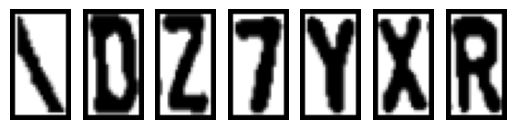

In [173]:
txt = ' '
for i in range(len(char)):
    plt.subplot(1, len(char), i+1)
    plt.imshow(char[i], cmap='gray')
    img_1 = Image.fromarray(char[i])
    img_1= img_1.convert("RGB")
    txt += pytesseract.image_to_string(img_1,lang ='eng',config='--psm 6')[0]
    plt.axis('off')
print(txt)